# Welcome to Session 7 - Getting Web-Based Data

Much useful data is available online and can be accessed with a script. Application Programming Interfaces (APIs) make data available using URLs that are requested (accessed) by the script. The data are delivered in a predicable format for use.

Note, some APIs limit how many requests can be made per time period, the rate of requests per second, etc. These may lock a user out if the requests criteria are exceeded.

Also, many APIs require users to register and obtain an API Key which must be used with requests to obtain data. This requires extra steps to authenticate with the API when using it. In this lesson, we're using APIs that do not require API keys.

## Requesting Data

### The requests() function

To make a request using a URL, we must use the Python requests function. It is not a core function, so we must import it.

This has two basic aspects:
1) The URL, which specifies the API address and the specific API application, or feature, that is requested
2) Data which forms the context of our request, to pass to the API

We'll use the [World Register of Marine Species (WoRMS) API](https://www.marinespecies.org/aphia.php?p=webservice) which is called Aphia.

In [ ]:
import requests

# We'll use the API to get the currently accepted species ID for Sciaenops ocellatus
# The API URL root (used for all Aphia API applications) is https://www.marinespecies.org/rest
# The sepcific API application to get the accepted species ID is /AphiaIDByName/{ScientificName}

sciname = 'Sciaenops ocellatus'
aphiaID = requests.get('https://www.marinespecies.org/rest/AphiaIDByName/{0}'.format(sciname)).json()
print(aphiaID)



Let's take a closer look at our request string

requests.get('https://www.marinespecies.org/rest/AphiaIDByName/{0}'.format(sciname)).json()

1) requests.get()
    * We're using the 'get' attribute of the requests function - this means we're using a URL to get the data
2) 'https://www.marinespecies.org/rest/AphiaIDByName/{0}'.format(sciname)
    * We're dynamically constructing the URL.
    * We've written most of it as a string, but we're using a placeholder {0} for the species name.
    * The .format() method (of the preceding string) is where we provide the data for the placeholder.
3) .json()
    * The API will return the data as a JSON ("JavaScript Object Notation") object. So we specify the .json() method for the requests() function.
    * This 'unpacks' the JSON data into a familar Python data structure of nested lists and dictionaries.


In this case, the API only returns a single item, so unpacking it gives us the AphiaID integer

In [ ]:
# Now let's use the AphiaID number to get vernaculars (common names) for Sciaenops ocellatus
# The specific API application to get the vernaculars for a given AphiaID is /AphiaVernacularsByAphiaID/{ID}


speciesVernacs = requests.get('https://www.marinespecies.org/rest/AphiaVernacularsByAphiaID/{0}'.format(aphiaID)).json()
print(speciesVernacs)

Here we have a chunk of data. We see square brackets and curly braces. We have lists and dictionaries.

#### Activity 1

We have a list of dictionaries, with each dictionary representing a vernacular. Iterate over the list and print the following for each dictionary:

"A vernacular for {species name} in {language} is {vernacular}"
e.g. "A vernacular for Sciaenops ocellatus in English is red drum"

Hint: Remember how we constructed the URL using a placeholder and the .format() method?
* You'll need to use three placeholders in sequential order (0,1,2)
* In the .format() section you'll need to list the three variables (two are dictionary references) separated by commas in the same order that you want to substitute them for the placeholders. 

In [ ]:
# Tackle Activity 1 here





### Activity 2

Now let's make another request using the AphiaID to get the full species classification

The specific API application for this is /AphiaClassificationByAphiaID/{ID}



In [ ]:
# Tackle Activity 2 here





This is a mess of nested dictionaries!

If we look closely, we see that we have a dictionary with four variables (AphiaID, rank, scientific name, and child. The first three have integer or string values, but the value of child is itself a dictionary. It has four variables of the same types, with child being a dictionary. And so on, all the way through the classification down to the species dictionary, which has a child with a value of None.

### Question [1]

How many levels of iteration would we have to go through to extract all of the data from this series of nested dictionaries?

### Recursive functions

In [ ]:
# It's neither efficient nor feasible to hard code many depths of nesting, especially if we don't know
# how many levels there will be.

# A really handy technique for addressing this is to write a recursive function.

def recur(mydict): # Pass the function a dictionary
    for k, v in mydict.items(): # Iterate over its top level, extracting keys and values
        if isinstance(v, dict): # Test type of value to see if it is a dictionary
            recur(v) # If it is a dictionary, call this same recur() function to process it
        else: # If it is not a dictionary (we assume in this case that it is a string, integer, etc.)
            print("{0} : {1}".format(k, v)) # print the key and value separated by spaces and a colon

recur(speciesClassif)
        

### Question 2

Why did 'child : None' print at the very end of the list?

### Activity 3

Using Callinectes sapidus as the species, write a script to use the Aphia API to accomplish the following:

1) Find the AphiaID for Callinectes sapidus (using /AphiaIDByName/{species name})
2) Use the AphiaID to get all synonyms for the species' scientific name (using /AphiaSynonymsByAphiaID/{ID})
3) Look at the output and iterate over it (no need for a recursive function here) to extract the synonym's scientific name, authority, and status, as well as the valid species name, and valid authority. Print a sentence using the data points to inform the reader about the unaccepted name and authority for the species and the currently accepted name and authority for the species.

In [ ]:
#Tackle Activity 3 here













### API requests that require several parameters.

Some APIs don't have multiple applications or URLs for making requests. The APIs typically have a single URL and the user must pass several parameters to define their request needs. An example of this is [NOAA's Tides & Currents API](https://api.tidesandcurrents.noaa.gov/api/prod/).

It is often necessary to read the API documentation to understand what data may be obtained, which parameters must be submitted, and how parameters must be formatted.

In [3]:
# We can construct this URL with its parameters, using a dictionary.
import requests

url = 'https://api.tidesandcurrents.noaa.gov/api/prod/datagetter'
payload = {
    'begin_date':'20130808 15:00',
    'end_date':'20130808',
    'station':'8454000',
    'product':'water_temperature',
    'units':'english',
    'time_zone':'gmt',
    'application':'CofC',
    'format':'json'
}

output = requests.get(url, params=payload).json()
print(output)

{'metadata': {'id': '8454000', 'name': 'Providence', 'lat': '41.8071', 'lon': '-71.4012'}, 'data': [{'t': '2013-08-08 15:00', 'v': '72.5', 'f': '0,0,0'}, {'t': '2013-08-08 15:06', 'v': '72.5', 'f': '0,0,0'}, {'t': '2013-08-08 15:12', 'v': '72.5', 'f': '0,0,0'}, {'t': '2013-08-08 15:18', 'v': '72.5', 'f': '0,0,0'}, {'t': '2013-08-08 15:24', 'v': '72.5', 'f': '0,0,0'}, {'t': '2013-08-08 15:30', 'v': '72.5', 'f': '0,0,0'}, {'t': '2013-08-08 15:36', 'v': '72.5', 'f': '0,0,0'}, {'t': '2013-08-08 15:42', 'v': '72.5', 'f': '0,0,0'}, {'t': '2013-08-08 15:48', 'v': '72.7', 'f': '0,0,0'}, {'t': '2013-08-08 15:54', 'v': '72.7', 'f': '0,0,0'}, {'t': '2013-08-08 16:00', 'v': '72.7', 'f': '0,0,0'}, {'t': '2013-08-08 16:06', 'v': '72.7', 'f': '0,0,0'}, {'t': '2013-08-08 16:12', 'v': '72.7', 'f': '0,0,0'}, {'t': '2013-08-08 16:18', 'v': '72.7', 'f': '0,0,0'}, {'t': '2013-08-08 16:24', 'v': '72.7', 'f': '0,0,0'}, {'t': '2013-08-08 16:30', 'v': '72.7', 'f': '0,0,0'}, {'t': '2013-08-08 16:36', 'v': '72.7

We need the [API Response Help page](https://api.tidesandcurrents.noaa.gov/api/prod/responseHelp.html) to understand how to interpret this output.

We have a dictionary containing two key-value pairs.
1. The metadata key references a dictionary containing four variables
2. the data key references a list containing a dictionary for every observation made.
    a. Each observation dictionary contains:
          i. A timestamp (t)
         ii. A value (v) for the measurement
        iii. A flag string with comma-separated data flags (0 means no flag and 1 means flag). See the [API Response Help page](https://api.tidesandcurrents.noaa.gov/api/prod/responseHelp.html) for flag explanations for each data type.

In [19]:
# We can print this much more clearly using the Pretty Printer module.

import pprint as pp
pp.pprint(output)

{'data': [{'f': '0,0,0', 't': '2013-08-08 15:00', 'v': '72.5'},
          {'f': '0,0,0', 't': '2013-08-08 15:06', 'v': '72.5'},
          {'f': '0,0,0', 't': '2013-08-08 15:12', 'v': '72.5'},
          {'f': '0,0,0', 't': '2013-08-08 15:18', 'v': '72.5'},
          {'f': '0,0,0', 't': '2013-08-08 15:24', 'v': '72.5'},
          {'f': '0,0,0', 't': '2013-08-08 15:30', 'v': '72.5'},
          {'f': '0,0,0', 't': '2013-08-08 15:36', 'v': '72.5'},
          {'f': '0,0,0', 't': '2013-08-08 15:42', 'v': '72.5'},
          {'f': '0,0,0', 't': '2013-08-08 15:48', 'v': '72.7'},
          {'f': '0,0,0', 't': '2013-08-08 15:54', 'v': '72.7'},
          {'f': '0,0,0', 't': '2013-08-08 16:00', 'v': '72.7'},
          {'f': '0,0,0', 't': '2013-08-08 16:06', 'v': '72.7'},
          {'f': '0,0,0', 't': '2013-08-08 16:12', 'v': '72.7'},
          {'f': '0,0,0', 't': '2013-08-08 16:18', 'v': '72.7'},
          {'f': '0,0,0', 't': '2013-08-08 16:24', 'v': '72.7'},
          {'f': '0,0,0', 't': '2013-08-0

Let's plot it using an external library, MatPlotLib (must download and install to use on your system).

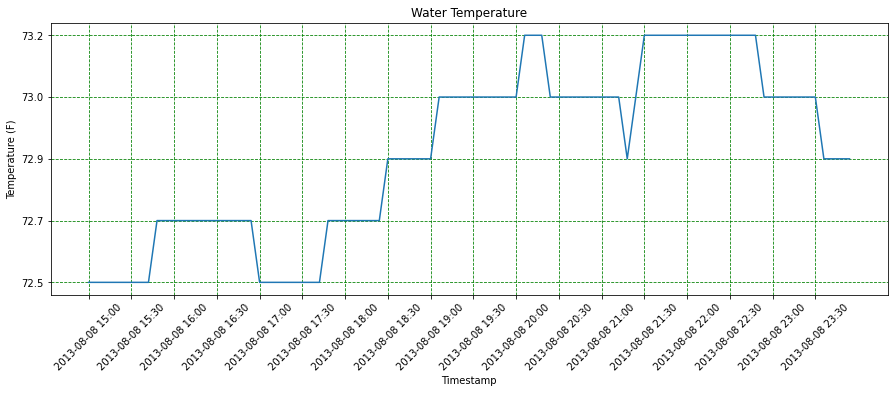

In [73]:
import matplotlib.pyplot as plt

ts=[] # an empty list fo the x axis
tmp=[] # an empty list for the y axis
for dict in output['data']: # Iterate over the data dictionaries to put the time and temp data in each list
    ts.append(dict['t'])
    tmp.append(dict['v'])

    
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(ts,tmp)
ax.set_xticks(ts[::5])
ax.set_xticklabels(ts[::5], rotation=45)
ax.set_title("Water Temperature")
plt.xlabel("Timestamp")
plt.ylabel("Temperature (F)")
plt.grid(color='green',linestyle='--')
plt.show()


### Quiz

[hyperlink to a quiz here. Perhaps we can use Google Forms quizzes with multi-choice questions to help solidify learning]

### Challenge [this is homework or to do if the class finishes early]

Challenge description [challenge is to consolidate and practice content learned during this session]

In [ ]:
#Tackle the challenge here [code space]




### Resources [web resources for reference or reading to help expand knowledge on this section's content]